# Import

In [2]:
library(igraph)
library(Matrix)
library(pracma)
library(resample)

# 1

## 1.1

### 1.1.a

In [ ]:
n = 1000
probs <- c(0.003, 0.004, 0.01, 0.05, 0.1)


for (p in probs) {
  g = sample_gnp(n, p, directed = FALSE, loops = FALSE)
  print ("----------------------------------------")
  print (paste("P :", p))
  plot(degree.distribution(g),main=paste("Degree Distribution of the Network for Probability = ", p),xlab="Degree",ylab="Frequency")
  #lines(seq(0,150, by=1),dbinom(seq(0,150, by=1),n,p), col = 'blue')
  
  # print(length(V(g)))
  print (paste("Mean degree:", mean(degree(g))))
  print (paste("Variance of degree:", var(degree(g))))
  
  
  #degreesVector <- degree(g)
}

### 1.1.b

In [ ]:
# 1. Estimate each generated network is connected
# 2. find the GCC and diameter

for (p in probs) {
  # 1
  print("------------------------")
  print(paste("Current p = ", p))
  g = sample_gnp(n, p, directed = FALSE, loops = FALSE)

  components = clusters(g)
  ix_max = which.max(components$csize)
  gcc = induced.subgraph(g, which(components$membership == ix_max))

  diameter_gcc = diameter(gcc, directed = FALSE)

  print(paste("diameter of the giant connected component is", diameter_gcc))
  print(paste("the size of the giant connected component is", vcount(gcc)))
  
  # prob
  number_of_connected = 0
  for (i in 0:999) {
    g = sample_gnp(n, p, directed = FALSE, loops = FALSE)
    if (is.connected(g)) {
      number_of_connected = number_of_connected + 1
    }
  }

  print(paste("probability that a generated network is connected over 1000 cases is ", number_of_connected / 1000))
}

### 1.1.c

In [ ]:
pmax = 0.009
probs <- seq(from=0.000, to=pmax, by=0.0001)
average_gcc_size <- c()
gcc_size_list <- c()
prob_list <- c()
for (p in probs) 
{
  size <- 0
  for (iter in 1:100)
  {
    g = sample_gnp(n, p, directed = FALSE, loops = FALSE)
    components <- clusters(g)
    ix <- which.max(components$csize)
    giant <- induced.subgraph(g, which(components$membership == ix))
    prob_list <- c(prob_list, p)  
    gcc_size_list <- c(gcc_size_list, length(V(giant))/1000)
    size <- size + length(V(giant))/1000  
    print(size)
  }
  average_gcc_size <- c(average_gcc_size,(size/100))  
  
}
plot(prob_list, gcc_size_list,col='red', main='GCC size trend', xlab = 'p.', ylab = 'Normalized GCC size')
lines(probs,average_gcc_size, )

### 1.1.d

In [ ]:
average_size <- function (p, n) {
  total_size = 0
  for (i in 0:99) {
    g = sample_gnp(n, p, directed = FALSE, loops = FALSE)
    components <- clusters(g)
    ix <- which.max(components$csize)
    GCC <- induced.subgraph(g, which(components$membership == ix))
    total_size = total_size + length(V(GCC))
  }
  return(total_size / 100)

}

#### i

In [ ]:
c <- 0.5
num_of_nodes = seq(100, 10000, 150)
p <- c/num_of_nodes

plot(num_of_nodes, p, main = 'The trend of P', xlab = 'nodes number', ylab ='P value')

gcc_size_list <- c()
for ( i in 1:length(num_of_nodes)) {
  gcc_size_list <- c(gcc_size_list, average_size(p[i], num_of_nodes[i]))
}

plot(num_of_nodes, gcc_size_list, main = 'Size of GCC with c= 0.5', xlab = '# of nodes', ylab ='average size of GCC')

#### ii

In [ ]:
c <- 1
num_of_nodes = seq(100, 10000, 150)
p <- c/num_of_nodes

plot(num_of_nodes, p, main = 'The trend of P', xlab = 'nodes number', ylab ='P value')

gcc_size_list <- c()
for ( i in 1:length(num_of_nodes)) {
  gcc_size_list <- c(gcc_size_list, average_size(p[i], num_of_nodes[i]))
}

plot(num_of_nodes, gcc_size_list, main = 'Size of GCC with c= 0.1', xlab = '# of nodes', ylab ='average size of GCC')

#### iii

In [ ]:
c <- 1.1
num_of_nodes = seq(100, 10000, 150)
p <- c/num_of_nodes


gcc_size_list_1 <- c()
for ( i in 1:length(num_of_nodes)) {
  gcc_size_list_1 <- c(gcc_size_list_1, average_size(p[i], num_of_nodes[i]))
}

c <- 1.2
num_of_nodes = seq(100, 10000, 150)
p <- c/num_of_nodes


gcc_size_list_2 <- c()
for ( i in 1:length(num_of_nodes)) {
  gcc_size_list_2 <- c(gcc_size_list_2, average_size(p[i], num_of_nodes[i]))
}


c <- 1.3
num_of_nodes = seq(100, 10000, 150)
p <- c/num_of_nodes


gcc_size_list_3 <- c()
for ( i in 1:length(num_of_nodes)) {
  gcc_size_list_3 <- c(gcc_size_list_3, average_size(p[i], num_of_nodes[i]))
}


plot(num_of_nodes, gcc_size_list_1,main = 'size of the GCC', xlab = '# of nodes', ylab ='average size of GCC',col="green")
points(num_of_nodes,gcc_size_list_2,col="red")
points(num_of_nodes,gcc_size_list_3,col="black")

## 1.2

### 1.2.a

In [ ]:
n <- 1000
m <- 1
pa_1000 <- sample_pa(n, m, directed=FALSE)
is_connected(pa_1000)
pa_1000
plot(pa_1000, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=%.0f m=%.0f", n, m))

### 1.2.b

In [ ]:
pa_1000_community <- cluster_fast_greedy(pa_1000)
pa_1000_modularity <- modularity(pa_1000_community)
pa_1000_modularity

plot(pa_1000_community, pa_1000, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure using Fast Greedy, n=%.0f m=%.0f", n, m))

### 1.2.c

In [ ]:
n <- 10000
pa_10000 <- sample_pa(n, m, directed=FALSE)
plot(pa_1000, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=%.0f m=%.0f", n, m))

pa_10000_community <- cluster_fast_greedy(pa_10000)
pa_10000_modularity <- modularity(pa_10000_community)
pa_10000_modularity

plot(pa_10000_community, pa_10000, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure using Fast Greedy, n=%.0f m=%.0f", n, m))

### 1.2.d

In [ ]:
degree_1000 <- degree_distribution(pa_1000)
degree_10000 <- degree_distribution(pa_10000)

invalid_idx_1000 <- is.infinite(log(degree_1000))
invalid_idx_10000 <- is.infinite(log(degree_10000))

log_degree_1000_df <- log(data.frame(x=seq_along(degree_1000)-1,
                           y=degree_1000)[!invalid_idx_1000,])
log_degree_10000_df <- log(data.frame(x=seq_along(degree_10000)-1,
                           y=degree_10000)[!invalid_idx_10000,])

plot(log_degree_1000_df$x, log_degree_1000_df$y,
     xlab="Degree", ylab="Fraction of Nodes")
lm(y~x, log_degree_1000_df)
abline(lm(y~x, log_degree_1000_df), col="red")
title(sprintf("Degree Distribution, n=1000 m=%.0f", m))

plot(log_degree_10000_df$x, log_degree_10000_df$y,
    xlab="Degree", ylab="Fraction of Nodes")
lm(y~x, log_degree_10000_df)
abline(lm(y~x, log_degree_10000_df), col="red")
title(sprintf("Degree Distribution, n=10000 m=%.0f", m))

lm(y~x, log_degree_1000_df)
lm(y~x, log_degree_10000_df)

### 1.2.e

In [ ]:
iterations <- 10000
degrees_1000 <- c()
for (i in 1:iterations){
    node_i = sample(vcount(pa_1000), 1)
    neighbor_nodes = neighbors(pa_1000, node_i)
    node_j = sample(neighbor_nodes, 1)
    degrees_1000 = c(degrees_1000, degree(pa_1000, node_j))
}

degrees_df_1000 <- as.data.frame(table(degrees_1000))
#degrees_df

log_degrees_1000 <- log(as.numeric(as.character(degrees_df_1000$degrees_1000)))
log_freq_1000 <- log(as.numeric(as.character(degrees_df_1000$Freq/iterations)))

plot(log_degrees_1000, log_freq_1000,
     xlab="Degree", ylab="Fraction of Nodes")
title(sprintf("Degree Distribution of Neighbors, n=1000 m=%.0f", m))
lm(log_freq_1000~log_degrees_1000)
abline(lm(log_freq_1000~log_degrees_1000), col="red")

degrees_10000 <- c()
for (i in 1:iterations){
    node_i = sample(vcount(pa_10000), 1)
    neighbor_nodes = neighbors(pa_10000, node_i)
    node_j = sample(neighbor_nodes, 1)
    degrees_10000 = c(degrees_10000, degree(pa_10000, node_j))
}

degrees_df_10000 <- as.data.frame(table(degrees_10000))
#degrees_df

log_degrees_10000 <- log(as.numeric(as.character(degrees_df_10000$degrees_10000)))
log_freq_10000 <- log(as.numeric(as.character(degrees_df_10000$Freq/iterations)))

plot(log_degrees_10000, log_freq_10000,
     xlab="Degree", ylab="Fraction of Nodes")
title(sprintf("Degree Distribution of Neighbors, n=10000 m=%.0f", m))
lm(log_freq_10000~log_degrees_10000)
abline(lm(log_freq_10000~log_degrees_10000), col="red")

### 1.2.f

In [ ]:
iterations <- 10000
n <- 1000
m <- 1

degree_list <- integer(n)
age_list <- rev(seq(1:n))
for (i in 1:iterations) {
    g_1000 = sample_pa(n, m, directed=FALSE)
    degree_list = degree_list + degree(g_1000)
}
degree_list <- degree_list / iterations 

plot(seq(1:n), degree_list, xlab="Time Step i", ylab="Degree")
title(sprintf("Expected Degree at Time Step i, m=%.0f", m))

plot(age_list, degree_list, xlab="Age", ylab="Degree")
title(sprintf("Relationship between Age and Expected Degree, m=%.0f", m))

### 1.2.g

In [ ]:
m <- 2
#a
g_1000 <- sample_pa(1000, m=2, directed=FALSE)
is_connected(g_1000)
plot(g_1000, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=1000 m=%.0f", m))

In [ ]:
#b
g_community_1000 = cluster_fast_greedy(g_1000)
g_modularity_1000 = modularity(g_community_1000)
g_modularity_1000

plot(g_community_1000, g_1000, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure using Fast Greedy, n=1000 m=%.0f", m))

In [ ]:
#c
g_10000 = sample_pa(10000, m=2, directed=FALSE)
plot(g_10000, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=10000 m=%.0f", m))

In [ ]:
g_community_10000 = cluster_fast_greedy(g_10000)
g_modularity_10000 = modularity(g_community_10000)
g_modularity_10000

plot(g_community_10000, g_10000, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure using Fast Greedy, n=10000 m=%.0f", m))

In [ ]:
#d
degree_dist_1000 = degree_distribution(g_1000)
degree_dist_10000 = degree_distribution(g_10000)

invalid_idx_1000 = is.infinite(log(degree_dist_1000))
invalid_idx_10000 = is.infinite(log(degree_dist_10000))

log_degree_1000_df = log(data.frame(x=seq_along(degree_dist_1000)-1,
                           y=degree_dist_1000)[!invalid_idx_1000,])
log_degree_10000_df = log(data.frame(x=seq_along(degree_dist_10000)-1,
                           y=degree_dist_10000)[!invalid_idx_10000,])

plot(log_degree_10000_df$x, log_degree_10000_df$y,
     col='blue', xlab="Degree", ylab="Fraction of Nodes")
lm(y~x, log_degree_10000_df)
abline(lm(y~x, log_degree_10000_df), col="blue")

points(log_degree_1000_df$x, log_degree_1000_df$y, col="red")
lm(y~x, log_degree_1000_df)
abline(lm(y~x, log_degree_1000_df), col="red")
title(sprintf("Degree Distribution, m=%.0f", m))

legend('bottomleft', legend = c("n = 1000", "n  = 1000 (lin. reg.)","n  = 10000", "n  = 10000 (lin. reg.)"),
       lty = c(0,1,0,1), pch=c(1,NA,1,NA),
       col = c('red','red','blue','blue'))


In [ ]:
#e
iterations = 10000
degrees_1000 = c()
degrees_10000 = c()

for (i in 1:iterations){
    node_i_1000 = sample(vcount(g_1000), 1)
    neighbor_nodes_1000 = neighbors(g_1000, node_i_1000)
    node_j_1000 = sample(neighbor_nodes_1000, 1)
    degrees_1000 = c(degrees_1000, degree(g_1000, node_j_1000))
    
    node_i_10000 = sample(vcount(g_10000), 1)
    neighbor_nodes_10000 = neighbors(g_10000, node_i_10000)
    node_j_10000 = sample(neighbor_nodes_10000, 1)
    degrees_10000 = c(degrees_10000, degree(g_10000, node_j_10000))
}

degrees_df_1000 = as.data.frame(table(degrees_1000))
log_degrees_1000 = log(as.numeric(as.character(degrees_df_1000$degrees_1000)))
log_freq_1000 = log(as.numeric(as.character(degrees_df_1000$Freq/iterations)))

degrees_df_10000 <- as.data.frame(table(degrees_10000))
log_degrees_10000 <- log(as.numeric(as.character(degrees_df_10000$degrees_10000)))
log_freq_10000 <- log(as.numeric(as.character(degrees_df_10000$Freq/iterations)))

plot(log_degrees_10000, log_freq_10000,
     col="blue", xlab="Degree", ylab="Fraction of Nodes")
title(sprintf("Degree Distribution of Neighbors, m=%.0f", m))
lm(log_freq_10000~log_degrees_10000)
abline(lm(log_freq_10000~log_degrees_10000), col="blue")

points(log_degrees_1000, log_freq_1000, col="red")
lm(log_freq_1000~log_degrees_1000)
abline(lm(log_freq_1000~log_degrees_1000), col="red")

legend('bottomleft', legend = c("n = 1000", "n  = 1000 (lin. reg.)","n  = 10000", "n  = 10000 (lin. reg.)"),
       lty = c(0,1,0,1), pch=c(1,NA,1,NA),
       col = c('red','red','blue','blue'))

In [ ]:
#f
degree_list = integer(1000)
age_list = rev(seq(1:1000))
for (i in 1:iterations) {
    g_1000 = sample_pa(1000, m=2, directed=FALSE)
    degree_list = degree_list + degree(g_1000)
}
degree_list = degree_list / iterations 
plot(age_list, degree_list, xlab="Age", ylab="Degree")
title(sprintf("Relationship between Age and Expected Degree, m=%.0f", m))

In [ ]:
m <- 5
#a
g_1000 <- sample_pa(1000, m=5, directed=FALSE)
is_connected(g_1000)
plot(g_1000, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=1000 m=%.0f", m))

In [ ]:
#b
g_community_1000 = cluster_fast_greedy(g_1000)
g_modularity_1000 = modularity(g_community_1000)
g_modularity_1000

plot(g_community_1000, g_1000, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure using Fast Greedy, n=1000 m=%.0f", m))

In [ ]:
#c
g_10000 = sample_pa(10000, m=5, directed=FALSE)
plot(g_10000, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=10000 m=%.0f", m))

In [ ]:
g_community_10000 = cluster_fast_greedy(g_10000)
g_modularity_10000 = modularity(g_community_10000)
g_modularity_10000

plot(g_community_10000, g_10000, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure using Fast Greedy, n=10000 m=%.0f", m))

In [ ]:
#d
degree_dist_1000 = degree_distribution(g_1000)
degree_dist_10000 = degree_distribution(g_10000)

invalid_idx_1000 = is.infinite(log(degree_dist_1000))
invalid_idx_10000 = is.infinite(log(degree_dist_10000))

log_degree_1000_df = log(data.frame(x=seq_along(degree_dist_1000)-1,
                           y=degree_dist_1000)[!invalid_idx_1000,])
log_degree_10000_df = log(data.frame(x=seq_along(degree_dist_10000)-1,
                           y=degree_dist_10000)[!invalid_idx_10000,])

plot(log_degree_10000_df$x, log_degree_10000_df$y,
     col='blue', xlab="Degree", ylab="Fraction of Nodes")
lm(y~x, log_degree_10000_df)
abline(lm(y~x, log_degree_10000_df), col="blue")

points(log_degree_1000_df$x, log_degree_1000_df$y, col="red")
lm(y~x, log_degree_1000_df)
abline(lm(y~x, log_degree_1000_df), col="red")
title(sprintf("Degree Distribution, m=%.0f", m))

legend('bottomleft', legend = c("n = 1000", "n  = 1000 (lin. reg.)","n  = 10000", "n  = 10000 (lin. reg.)"),
       lty = c(0,1,0,1), pch=c(1,NA,1,NA),
       col = c('red','red','blue','blue'))


Call:
lm(formula = log_freq_10000 ~ log_degrees_10000)

Coefficients:
      (Intercept)  log_degrees_10000  
          -0.9261            -1.2122  



Call:
lm(formula = log_freq_1000 ~ log_degrees_1000)

Coefficients:
     (Intercept)  log_degrees_1000  
         -1.0934           -0.9729  


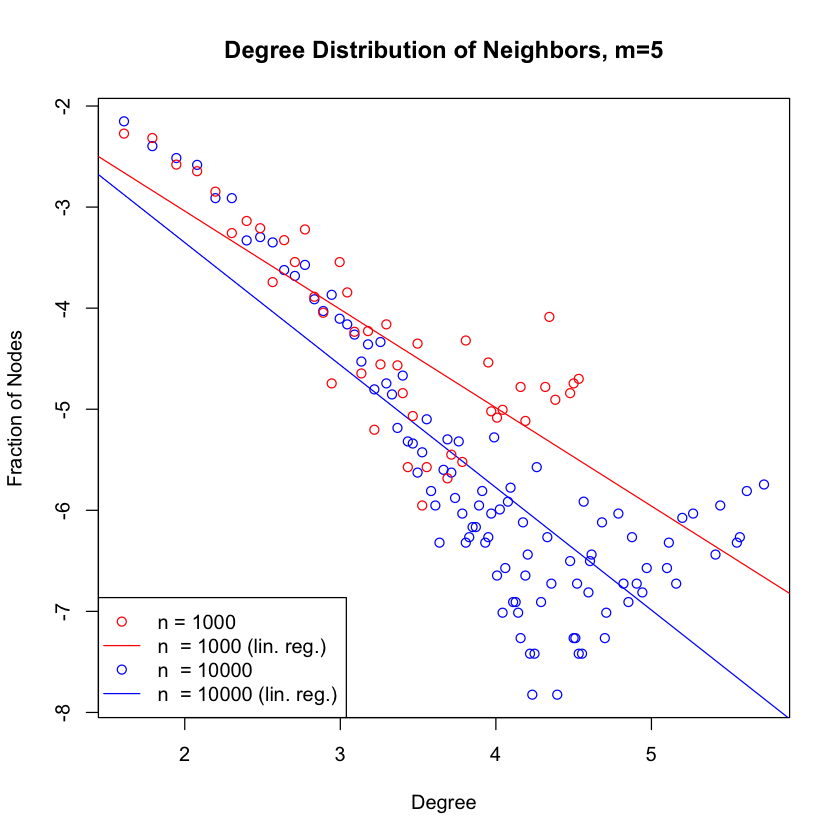

In [64]:
#e
iterations = 10000
degrees_1000 = c()
degrees_10000 = c()

for (i in 1:iterations){
    node_i_1000 = sample(vcount(g_1000), 1)
    neighbor_nodes_1000 = neighbors(g_1000, node_i_1000)
    node_j_1000 = sample(neighbor_nodes_1000, 1)
    degrees_1000 = c(degrees_1000, degree(g_1000, node_j_1000))
    
    node_i_10000 = sample(vcount(g_10000), 1)
    neighbor_nodes_10000 = neighbors(g_10000, node_i_10000)
    node_j_10000 = sample(neighbor_nodes_10000, 1)
    degrees_10000 = c(degrees_10000, degree(g_10000, node_j_10000))
}

degrees_df_1000 = as.data.frame(table(degrees_1000))
log_degrees_1000 = log(as.numeric(as.character(degrees_df_1000$degrees_1000)))
log_freq_1000 = log(as.numeric(as.character(degrees_df_1000$Freq/iterations)))

degrees_df_10000 <- as.data.frame(table(degrees_10000))
log_degrees_10000 <- log(as.numeric(as.character(degrees_df_10000$degrees_10000)))
log_freq_10000 <- log(as.numeric(as.character(degrees_df_10000$Freq/iterations)))

plot(log_degrees_10000, log_freq_10000,
     col="blue", xlab="Degree", ylab="Fraction of Nodes")
title(sprintf("Degree Distribution of Neighbors, m=%.0f", m))
lm(log_freq_10000~log_degrees_10000)
abline(lm(log_freq_10000~log_degrees_10000), col="blue")

points(log_degrees_1000, log_freq_1000, col="red")
lm(log_freq_1000~log_degrees_1000)
abline(lm(log_freq_1000~log_degrees_1000), col="red")

legend('bottomleft', legend = c("n = 1000", "n  = 1000 (lin. reg.)","n  = 10000", "n  = 10000 (lin. reg.)"),
       lty = c(0,1,0,1), pch=c(1,NA,1,NA),
       col = c('red','red','blue','blue'))

In [ ]:
#f
degree_list = integer(1000)
age_list = rev(seq(1:1000))
for (i in 1:iterations) {
    g_1000 = sample_pa(1000, m=5, directed=FALSE)
    degree_list = degree_list + degree(g_1000)
}
degree_list = degree_list / iterations 
plot(age_list, degree_list, xlab="Age", ylab="Degree")
title(sprintf("Relationship between Age and Expected Degree, m=%.0f", m))

### 1.2.h

In [ ]:
g <- sample_pa(n=1000, m=1, directed=FALSE)
plot(g, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=1000 m=1"))

comm <- cluster_fast_greedy(g)
mod <- modularity(comm)
mod

plot(comm, g, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure, n=1000 m=1"))

In [ ]:
g_sm <- sample_degseq(degree(g),method = 'simple.no.multiple')
plot(g_sm, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model using Stub-Matching, n=1000 m=1"))

comm_sm <- cluster_fast_greedy(g_sm)
mod_sm <- modularity(comm_sm)
mod_sm

plot(comm_sm, g_sm, vertex.size=3, vertex.label=NA)
title(sprintf("Community Structure using Stub-Matching, n=1000 m=1"))

## 1.3

### 1.3.a

[1] "Slope and intercept:"

Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.058       -3.249  



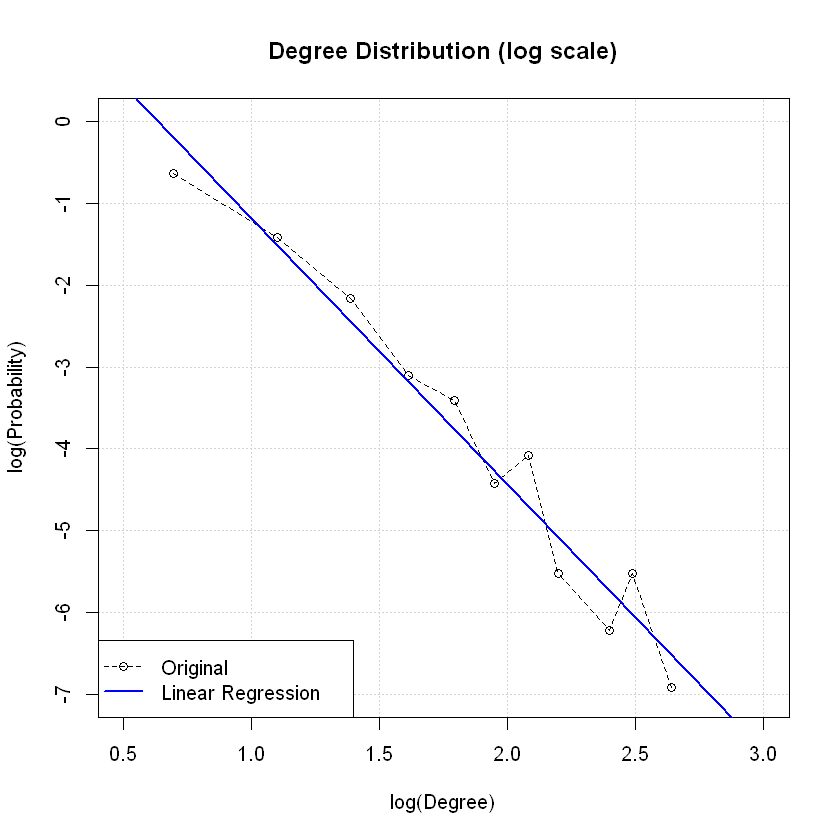

In [3]:
# Parameters
n = 1000
m = 1
alpha = 1
beta = -1
a = c = d = 1
b = 0

# Create graph
g = sample_pa_age(directed=FALSE, n=n, m=m, pa.exp=alpha, aging.exp=beta, 
                  zero.deg.appeal=a, zero.age.appeal=b, deg.coef=c, age.coef=d, 
                  aging.bin=n)
deg_dist = degree.distribution(g)

# Calculate log
idx = which(deg_dist != 0, arr.ind=TRUE)  #remove indexes of 0
x = log(seq(1:length(deg_dist)))[idx]
y = log(deg_dist)[idx]

# Find linear regression:
lr = lm(y ~ x)
print("Slope and intercept:")
print(lr)

# Plot degree
# png("plots/1.3.a_degree.png")
plot(x, y, grid(), xlim=c(0.5,3), ylim=c(-7,0), 
     main="Degree Distribution (log scale)", 
     xlab="log(Degree)", ylab="log(Probability)")
lines(x, y, lty=2)
abline(lr, col="blue", lwd=2)
legend('bottomleft', legend = c("Original","Linear Regression"),
       lty = c(2,1), lwd = c(1,2), pch=c(1,NA), col = c('black','blue'))
# dev.off()

### 1.3.b

[1] "Modularity: 0.934845"


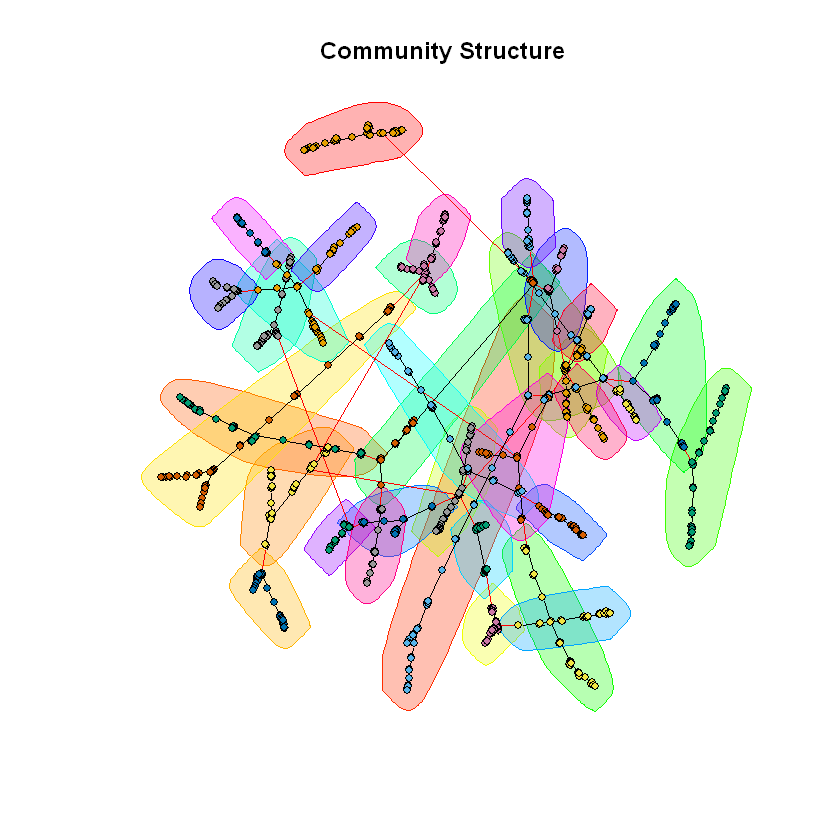

In [4]:
# Find clusters
g_clusts = cluster_fast_greedy(g)
clusts_sizes = sizes(g_clusts)
g_mod = modularity(g_clusts)
print(sprintf("Modularity: %f", g_mod))

# Plot clusters
# png("plots/1.3.b_clusters.png")
plot(g_clusts, g, vertex.size=3, vertex.label=NA,
     main="Community Structure")
# dev.off()

# 2

## 2.1

### 2.1.a

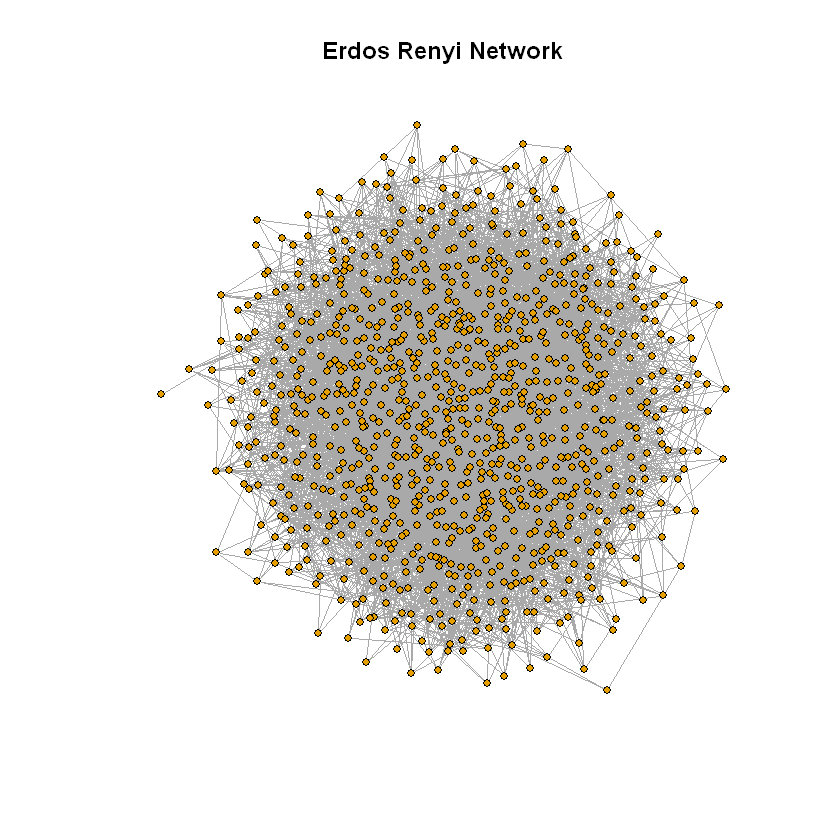

In [5]:
# Parameters
n = 1000
p = 0.01

# Create graph
g <- sample_gnp(n, p, directed=F)

# Plot network
# png(sprintf("plots/2.1.a_graph_%d.png", n))
plot(g, vertex.size=3, vertex.label=NA, 
     main = "Erdos Renyi Network")
# dev.off()

### 2.1.b

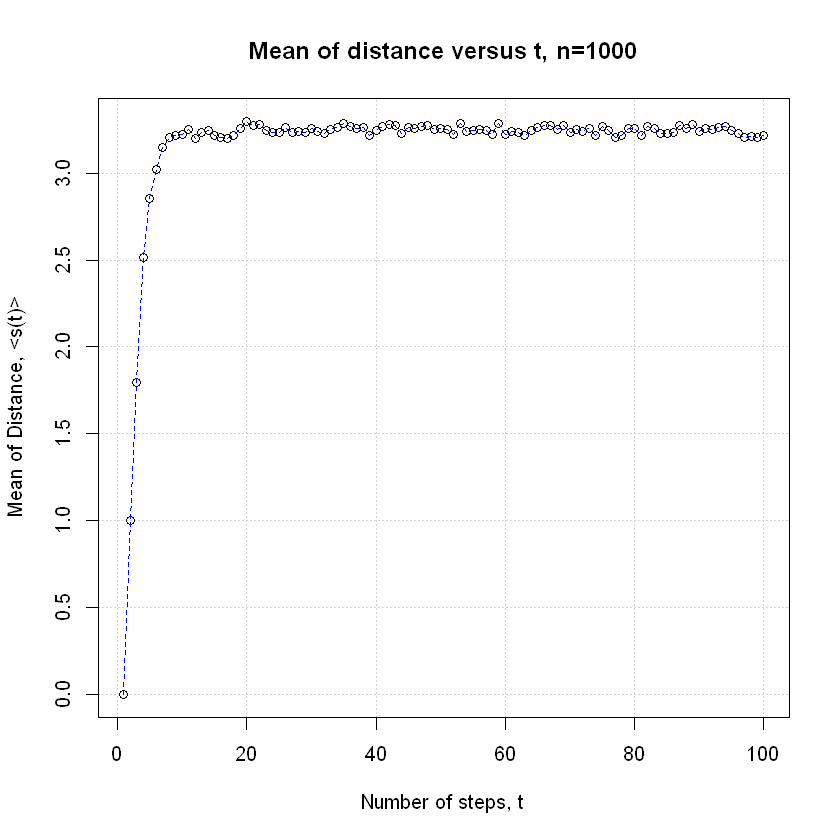

[1] 5


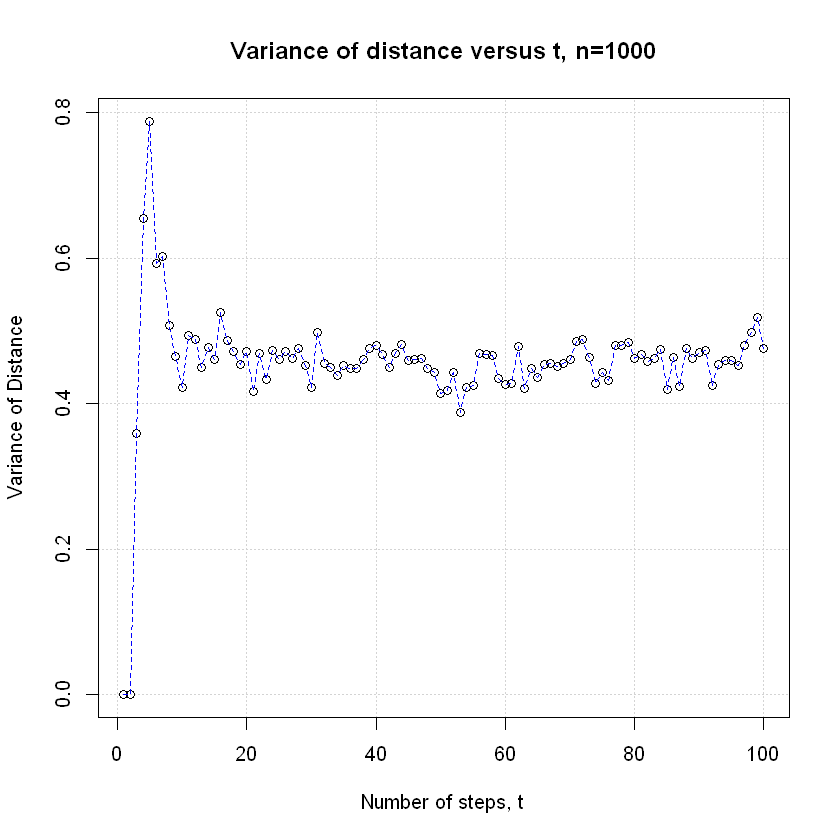

In [8]:
# Parameters
steps = 100
iters = 1000

# Calculate s(t)
s_t = matrix(data=NA, nrow=iters, ncol=steps)
deg_end = array(data=NA, dim=iters)
for (i in 1:1000){
    # Find GCC
    if(is_connected(g)){
        gcc <- g
    }
    else{
        g.components <- clusters(g)
        idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == idx))
    }
    # Random walk
    start = sample(V(gcc), 1)
    walked_nodes = random_walk(gcc, start, steps)
    s_t[i,] = shortest.paths(gcc, walked_nodes, start)
    deg_end[i] = degree(gcc, walked_nodes[length(walked_nodes)])  
}

# Plot mean
# png(sprintf("plots/2.1.b_average_%d.png", n))
plot(seq(1,100,1), colMeans(s_t), grid(), 
     main=sprintf("Mean of distance versus t, n=%d", n),
     xlab = 'Number of steps, t', ylab = 'Mean of Distance, <s(t)>')
lines(lowess(seq(1,100,1), colMeans(s_t), f = 0.03), col="blue", lty=2)
# dev.off()

# Plot variance
# png(sprintf("plots/2.1.b_variance_%d.png", n))
plot(seq(1,100,1), colVars(s_t), grid(), 
     main=sprintf("Variance of distance versus t, n=%d", n),
     xlab = 'Number of steps, t', ylab = 'Variance of Distance')
lines(lowess(seq(1,100,1), colVars(s_t), f = 0.02), col="blue", lty=2)
# dev.off()

print(diameter(g))

### 2.1.c

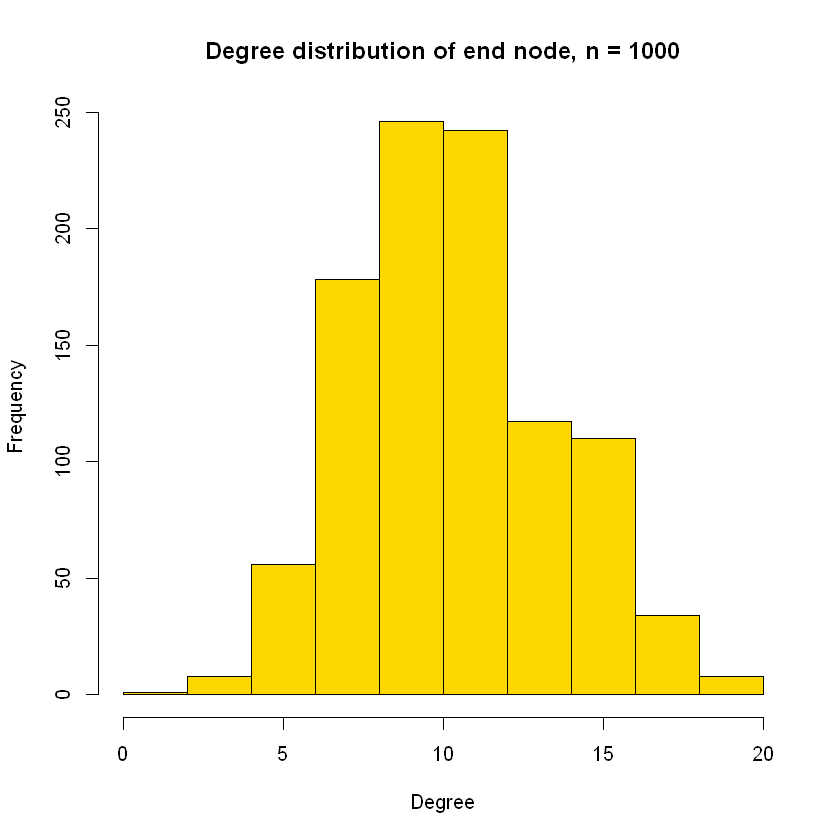

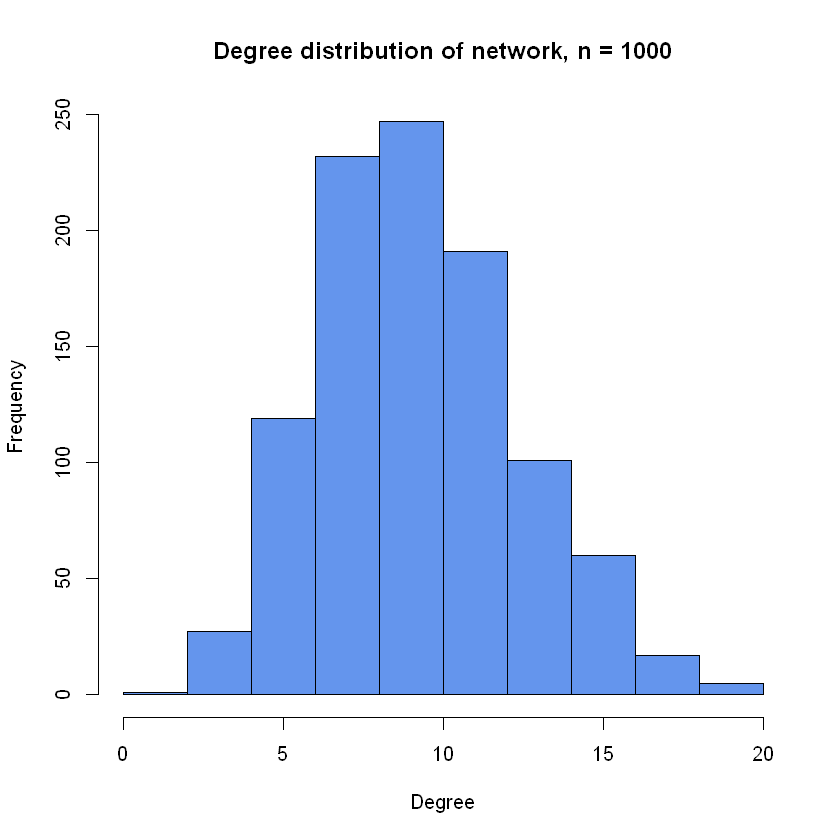

In [7]:
# Plot degree
# png("plots/2.1.c_endnode.png")
hist(deg_end, col='gold',
     main="Degree distribution of end node, n = 1000",
     xlab='Degree', ylab='Frequency')
# dev.off()
# png("plots/2.1.c_network.png")
hist(degree(g), col='cornflowerblue',
     main="Degree distribution of network, n = 1000",
     xlab='Degree', ylab='Frequency')
# dev.off()

### 2.1.d

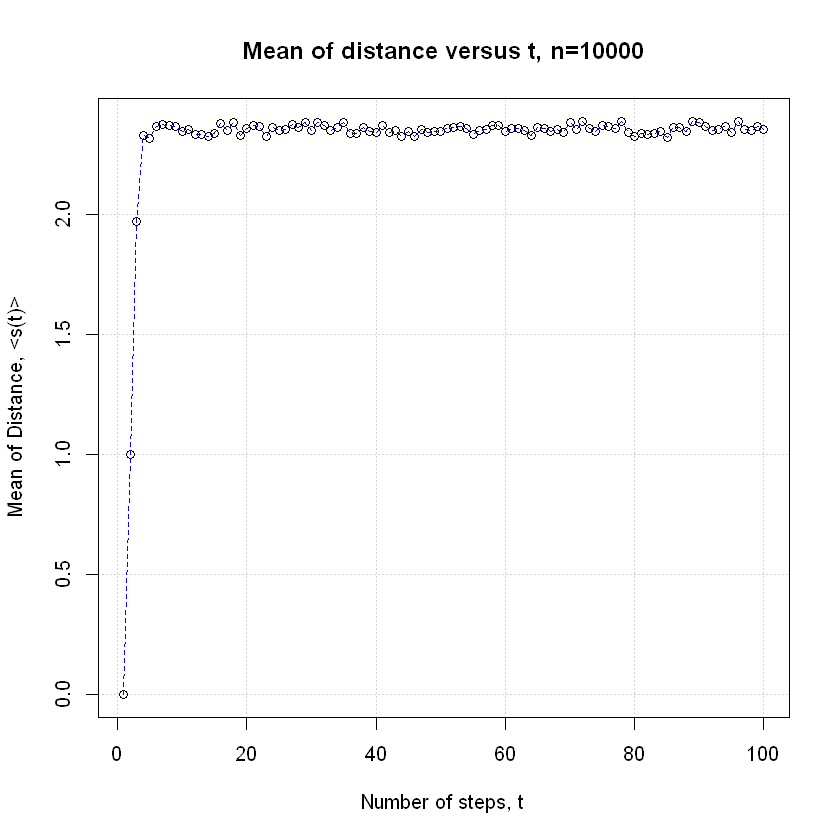

[1] 3


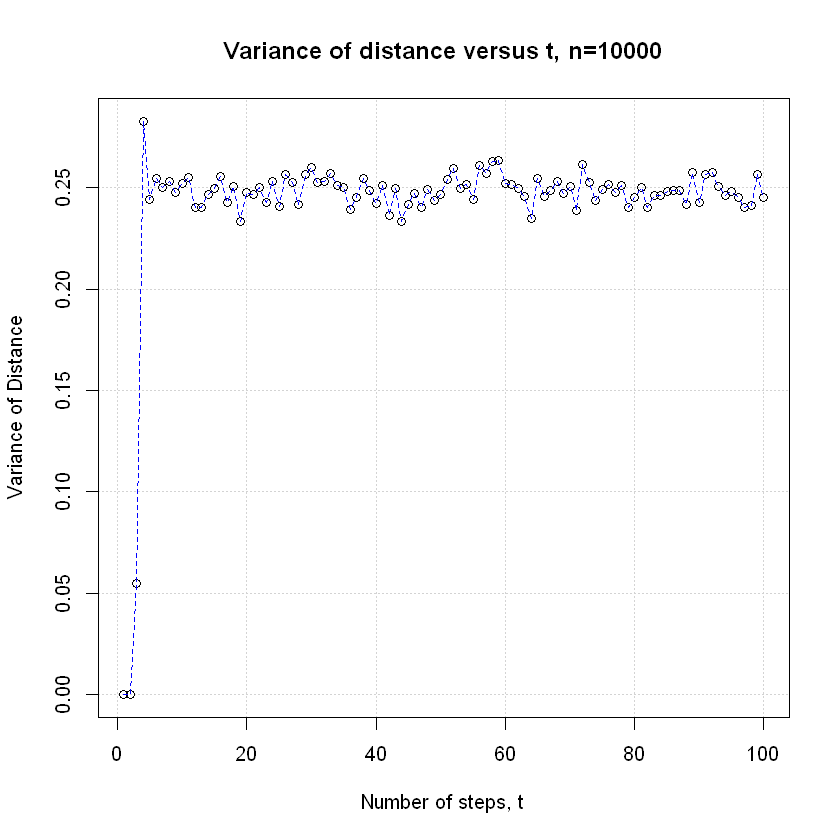

In [9]:
# Parameters
n = 10000
p = 0.01
steps = 100
iters = 1000

# Create graph
g <- sample_gnp(n, p, directed=F)

# Calculate s(t)
s_t = matrix(data=NA, nrow=iters, ncol=steps)
deg_end = array(data=NA, dim=iters)
for (i in 1:1000){
    # Find GCC
    if(is_connected(g)){
        gcc <- g
    }
    else{
        g.components <- clusters(g)
        idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == idx))
    }
    # Random walk
    start = sample(V(gcc), 1)
    walked_nodes = random_walk(gcc, start, steps)
    s_t[i,] = shortest.paths(gcc, walked_nodes, start)
    deg_end[i] = degree(gcc, walked_nodes[length(walked_nodes)])  
}

# Plot mean
# png(sprintf("plots/2.1.b_average_%d.png", n))
plot(seq(1,100,1), colMeans(s_t), grid(), 
     main=sprintf("Mean of distance versus t, n=%d", n),
     xlab = 'Number of steps, t', ylab = 'Mean of Distance, <s(t)>')
lines(lowess(seq(1,100,1), colMeans(s_t), f = 0.03), col="blue", lty=2)
# dev.off()

# Plot variance
# png(sprintf("plots/2.1.b_variance_%d.png", n))
plot(seq(1,100,1), colVars(s_t), grid(), 
     main=sprintf("Variance of distance versus t, n=%d", n),
     xlab = 'Number of steps, t', ylab = 'Variance of Distance')
lines(lowess(seq(1,100,1), colVars(s_t), f = 0.02), col="blue", lty=2)
# dev.off()

print(diameter(g))


## 2.2

### 2.2.a

In [ ]:
n <- 1000
m <- 1
g <- sample_pa(n, m, directed=FALSE)
g
plot(g, vertex.size=3, vertex.label=NA)
title(sprintf("Parental Attachment Model, n=%.0f m=%.0f", n, m))

### 2.2.b

In [ ]:
# Parameters
steps = 100
iters = 1000

# Calculate s(t)
s_t = matrix(data=NA, nrow=iters, ncol=steps)
deg_end = array(data=NA, dim=iters)
for (i in 1:1000){
    # Find GCC
    if(is_connected(g)){
        gcc <- g
    }
    else{
        g.components <- clusters(g)
        idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == idx))
    }
    # Random walk
    start = sample(V(gcc), 1)
    walked_nodes = random_walk(gcc, start, steps)
    s_t[i,] = shortest.paths(gcc, walked_nodes, start)
    deg_end[i] = degree(gcc, walked_nodes[length(walked_nodes)])  
}

# Plot mean
plot(seq(1,100,1), colMeans(s_t), grid(), 
     main="Mean of distance versus t",
     xlab = 'Number of steps, t', ylab = 'Mean of Distance, <s(t)>')
lines(lowess(seq(1,100,1), colMeans(s_t), f = 0.03), col="blue", lty=2)

# Plot variance
plot(seq(1,100,1), colVars(s_t), grid(), 
     main="Variance of distance versus t",
     xlab = 'Number of steps, t', ylab = 'Variance of Distance')
lines(lowess(seq(1,100,1), colVars(s_t), f = 0.02), col="blue", lty=2)

### 2.2.c

In [ ]:
# Plot degree
hist(deg_end, col='gold',
     main="Degree distribution of end node, n = 1000",
     xlab='Degree', ylab='Frequency')

hist(degree(g), col='cornflowerblue',
     main="Degree distribution of network, n = 1000",
     xlab='Degree', ylab='Frequency')

### 2.2.d

In [ ]:
g <- sample_pa(n=100, m=1, directed=FALSE)

# Parameters
steps = 100
iters = 1000

# Calculate s(t)
s_t = matrix(data=NA, nrow=iters, ncol=steps)
deg_end = array(data=NA, dim=iters)
for (i in 1:1000){
    # Find GCC
    if(is_connected(g)){
        gcc <- g
    }
    else{
        g.components <- clusters(g)
        idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == idx))
    }
    # Random walk
    start = sample(V(gcc), 1)
    walked_nodes = random_walk(gcc, start, steps)
    s_t[i,] = shortest.paths(gcc, walked_nodes, start)
    deg_end[i] = degree(gcc, walked_nodes[length(walked_nodes)])  
}

# Plot mean
plot(seq(1,100,1), colMeans(s_t), grid(), 
     main="Mean of distance versus t, n=100",
     xlab = 'Number of steps, t', ylab = 'Mean of Distance, <s(t)>')
lines(lowess(seq(1,100,1), colMeans(s_t), f = 0.03), col="blue", lty=2)

# Plot variance
plot(seq(1,100,1), colVars(s_t), grid(), 
     main="Variance of distance versus t, n=100",
     xlab = 'Number of steps, t', ylab = 'Variance of Distance')
lines(lowess(seq(1,100,1), colVars(s_t), f = 0.02), col="blue", lty=2)

In [ ]:
g <- sample_pa(n=10000, m=1, directed=FALSE)

# Parameters
steps = 100
iters = 1000

# Calculate s(t)
s_t = matrix(data=NA, nrow=iters, ncol=steps)
deg_end = array(data=NA, dim=iters)
for (i in 1:1000){
    # Find GCC
    if(is_connected(g)){
        gcc <- g
    }
    else{
        g.components <- clusters(g)
        idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == idx))
    }
    # Random walk
    start = sample(V(gcc), 1)
    walked_nodes = random_walk(gcc, start, steps)
    s_t[i,] = shortest.paths(gcc, walked_nodes, start)
    deg_end[i] = degree(gcc, walked_nodes[length(walked_nodes)])  
}

# Plot mean
plot(seq(1,100,1), colMeans(s_t), grid(), 
     main="Mean of distance versus t, n=10000",
     xlab = 'Number of steps, t', ylab = 'Mean of Distance, <s(t)>')
lines(lowess(seq(1,100,1), colMeans(s_t), f = 0.03), col="blue", lty=2)

# Plot variance
plot(seq(1,100,1), colVars(s_t), grid(), 
     main="Variance of distance versus t, n=10000",
     xlab = 'Number of steps, t', ylab = 'Variance of Distance')
lines(lowess(seq(1,100,1), colVars(s_t), f = 0.02), col="blue", lty=2)

## 2.3

In [ ]:
# Generate two graphs
graph <-  sample_pa(1000, m=4, directed=T)
graph_to_add <- sample_pa(1000, m=4, directed=T)

# Permute idx
g_permuted = as_edgelist(permute(graph_to_add, sample(vcount(graph_to_add))), names = FALSE)
g_permuted_vectors = as.vector(t(g_permuted))


# add graph
refined_graph <- add_edges(graph,g_permuted_vectors)


In [ ]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    #print(adj)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    #print(z)
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [ ]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL,teleport = FALSE,alpha=0.15){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        if (teleport == TRUE) {
          #rn = generate a random number betweem 0 and 1 with uniform distribution 
          PMF = (1-alpha) * PMF + alpha/vcount(g)
          v = sample(1:vcount(g), 1, prob = PMF)       

        } else {
          v = sample(1:vcount(g), 1, prob = PMF)        
        }
        #print(PMF)
        
    }
    
    return(v)
}

### 2.3.a

In [ ]:
# Create a map to record frequency
freq_map=numeric(vcount(refined_graph))

total_steps = 1000
iterations = 1000

transition_refined_graph = create_transition_matrix(refined_graph)

for (i in 0:iterations) {
  start_point = sample(1:vcount(refined_graph), 1)
  arrival_point = random_walk(refined_graph, total_steps, start_point, transition_matrix=transition_refined_graph)
  freq_map[arrival_point] = freq_map[arrival_point] + 1
}

frequency_Value = freq_map / iterations

plot(degree(refined_graph), frequency_Value, main="Probability of arriving Node",xlab="Node Degree",ylab="Probability")


### 2.3.b

In [ ]:
# Create a map to record frequency
freq_map=numeric(vcount(refined_graph))

total_steps = 250
iterations = 1000

transition_refined_graph = create_transition_matrix(refined_graph)

for (i in 0:iterations) {
  start_point = sample(1:vcount(refined_graph), 1)
  arrival_point = random_walk(refined_graph, total_steps, start_point, transition_matrix=transition_refined_graph, teleport=TRUE)
  freq_map[arrival_point] = freq_map[arrival_point] + 1
}

frequency_Value = freq_map / iterations

plot(degree(refined_graph), frequency_Value, main="Probability of arriving Node",xlab="Node Degree",ylab="Probability")

## 2.4

### 2.4.a

In [ ]:
# Generate a page rank result
freq_map_q4 =numeric(vcount(refined_graph))
iteration = 1000
steps = 1000
page_rank_result = page_rank(refined_graph)$vector


In [ ]:
random_walk_pr = function (g, num_steps, start_node, transition_matrix = NULL,teleport = FALSE,pr,alpha=0.15){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        PMF = (1-alpha) * PMF + alpha*pr
        #print(PMF)
        n = sample(1:vcount(g), 1, prob = PMF)
        v = n        
    }
    
    return(v)
}
print(typeof(page_rank_result))

In [ ]:
transition_refined_graph = create_transition_matrix(refined_graph)

for (i in 0:iteration) {
  start_point = sample(1:vcount(refined_graph), 1)
  arrival_point = random_walk_pr(refined_graph, steps, start_point, transition_matrix=transition_refined_graph, teleport=TRUE, pr=page_rank_result)
  freq_map_q4[arrival_point] = freq_map_q4[arrival_point] + 1
}

freq_map_q4 = freq_map_q4 / iteration

plot(degree(refined_graph), freq_map_q4, main="Q4 a page rank result",xlab="Degree",ylab="Prob")


### 2.4.b

In [ ]:
random_walk_pr_median = function (g, num_steps, start_node, transition_matrix = NULL,teleport = FALSE,pr,alpha=0.15){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        PMF = (1-alpha) * PMF + alpha*pr
        #print(PMF)
        n = sample(1:vcount(g), 1, prob = PMF)
        v = n        
    }
    
    return(v)
}

In [ ]:
map_f=numeric(vcount(refined_graph))
iterations = 1000
steps = 1000

sorted_list = sort(page_rank(refined_graph)$vector, index.return=TRUE)$ix
point1 = sorted_list[vcount(refined_graph)/2]

point2 =  sorted_list[vcount(refined_graph)/2+1]


teleportation_prob = numeric(vcount(refined_graph))
teleportation_prob[point1] = 1/2
teleportation_prob[point2] = 1/2
transition_refined_graph = create_transition_matrix(refined_graph)

for (i in 1:iterations) {
    start_point = sample(1:vcount(refined_graph), 1)
    arrival_point = random_walk_pr_median(refined_graph, steps, start_node=start_point, transition_matrix =transition_refined_graph ,teleport=TRUE, pr=teleportation_prob,alpha = 0.15)
    
    map_f[arrival_point] = map_f[arrival_point] + 1
    
}
frequency_Value = map_f / iterations


In [ ]:
plot(degree(refined_graph), frequency_Value, main="Q4 b median prob",xlab="Degree",ylab="Prob")